In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as sm
!pip install dmba
from dmba import stepwise_selection
from dmba import AIC_score

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/LungDisease.csv')

In [ ]:
df.head()

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1


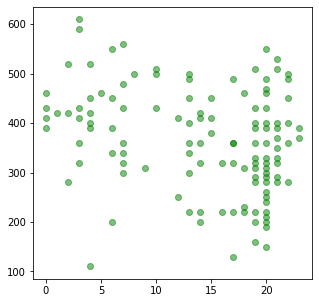

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(df.iloc[:,1],df.iloc[:,0],color='green',alpha=0.5)
plt.show()

In Python we use, LinearRegression from the scikit-learn package.

In [ ]:
predictors = ['Exposure']
outcome = 'PEFR'

model = lm.LinearRegression()
model.fit(df[predictors],df[outcome])

print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')

Intercept: 424.583
Coefficient Exposure: -4.185


In [ ]:
"""
With scikit-learn’s LinearRegression model, we use the predict method on the
training data to get the fitted values and subsequently the residuals. As we will see,
this is a general pattern that all models in scikit-learn follow
"""

fitted = model.predict(df[predictors])
residuals = df[outcome] - fitted

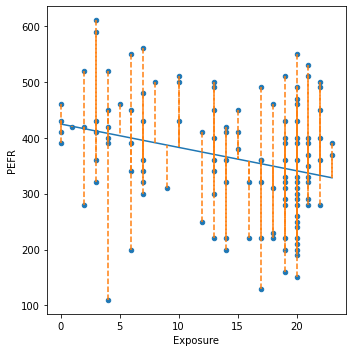

In [ ]:
ax = df.plot.scatter(x='Exposure', y='PEFR', figsize=(5, 5))
ax.plot(df.Exposure, fitted)
for x, yactual, yfitted in zip(df.Exposure, df.PEFR, fitted): 
    ax.plot((x, x), (yactual, yfitted), '--', color='C1')

plt.tight_layout()
plt.show()

# Multiple Linear Regression

In [ ]:
import random
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive/colab_notebooks/machine_learning/Interview_prep/Statistics4DataScientist/
df = pd.read_csv("house_sales.csv",sep='\t')

/content/drive/My Drive/colab_notebooks/machine_learning/Interview_prep/Statistics4DataScientist


In [ ]:
df
subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
          'Bedrooms', 'BldgGrade']
df = df[subset]
df.head()

,AdjSalePrice,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade
1,300805.0,2400,9373,3.00,6,7
2,1076162.0,3764,20156,3.75,4,10
3,761805.0,2060,26036,1.75,4,8
4,442065.0,3200,8618,3.75,5,7
5,297065.0,1720,8620,1.75,4,7


The goal is to predict the house price from other variables 

In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
          'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = lm.LinearRegression()
house_lm.fit(df[predictors],df[outcome])

LinearRegression()

In [ ]:
print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, house_lm.coef_):
    print(f' {name}: {coef}')

Intercept: -521871.368
Coefficients:
 SqFtTotLiving: 228.83060360240796
 SqFtLot: -0.06046682065307607
 Bathrooms: -19442.840398321056
 Bedrooms: -47769.95518521438
 BldgGrade: 106106.96307898083


In [ ]:
import numpy as np
#mean square error and r2_Score
fitted = house_lm.predict(df[predictors])
RMSE = np.sqrt(mean_squared_error(df[outcome],fitted))
r2 = r2_score(df[outcome],fitted)

print("RMSE:",RMSE)
print("r2_Score:",r2)

RMSE: 261220.19743696266
r2_Score: 0.5405875253381902


In [ ]:
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')

RMSE: 261220
r2: 0.5406


In [ ]:
# Use statmodels, to get a more detailed analysis  of the regression model in Python
import statsmodels.api as sm

model = sm.OLS(df[outcome],df[predictors].assign(const=1))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                        09:06:31   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   228.8306      3.899     58.694

In [ ]:
columns = df.columns

In [ ]:
print(df.head())
df.info()

  DocumentDate  SalePrice  PropertyID   PropertyType          ym  zhvi_px  \
1   2014-09-16     280000     1000102      Multiplex  2014-09-01   405100   
2   2006-06-16    1000000     1200013  Single Family  2006-06-01   404400   
3   2007-01-29     745000     1200019  Single Family  2007-01-01   425600   
4   2008-02-25     425000     2800016  Single Family  2008-02-01   418400   
5   2013-03-29     240000     2800024  Single Family  2013-03-01   351600   

   zhvi_idx  AdjSalePrice  NbrLivingUnits  SqFtLot  ...  Bathrooms  Bedrooms  \
1  0.930836      300805.0               2     9373  ...       3.00         6   
2  0.929228     1076162.0               1    20156  ...       3.75         4   
3  0.977941      761805.0               1    26036  ...       1.75         4   
4  0.961397      442065.0               1     8618  ...       3.75         5   
5  0.807904      297065.0               1     8620  ...       1.75         4   

   BldgGrade  YrBuilt  YrRenovated  TrafficNoise  LandVa

In [ ]:
columns

Index(['DocumentDate', 'SalePrice', 'PropertyID', 'PropertyType', 'ym',
       'zhvi_px', 'zhvi_idx', 'AdjSalePrice', 'NbrLivingUnits', 'SqFtLot',
       'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms', 'Bedrooms',
       'BldgGrade', 'YrBuilt', 'YrRenovated', 'TrafficNoise', 'LandVal',
       'ImpsVal', 'ZipCode', 'NewConstruction'],
      dtype='object')

In [ ]:
# In Python, we need to convert  the categorical and boolean variables into numbers 

predictors = ['SqFtTotLiving','SqFtLot','Bathrooms','Bedrooms','BldgGrade',
              'PropertyType','NbrLivingUnits','SqFtFinBasement','YrBuilt',
              'YrRenovated','NewConstruction']
X = pd.get_dummies(df[predictors],drop_first=True) # adds a new column for categorial
X['NewConstruction'] = [ 1 if nc else 0 for nc  in X['NewConstruction']]

In [ ]:
house_full = sm.OLS(df[outcome],X.assign(const=1))
results = house_full.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2771.
Date:                Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                        09:46:30   Log-Likelihood:            -3.1375e+05
No. Observations:               22687   AIC:                         6.275e+05
Df Residuals:                   22674   BIC:                         6.276e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
SqFtTotLiving       

In [ ]:
# We can use the stepwise selection using the _dmba_ package.

y = df[outcome]

def train_model(variables):
  #print("variables",variables)
  if len(variables) == 0:
    return None
  model = lm.LinearRegression()
  model.fit(X[variables],y)
  return model


In [ ]:
def score_model(model,variables):
  if len(variables) == 0:
    return AIC_score(y,[y.mean()]*len(y),model,df=1)
  return AIC_score(y, model.predict(X[variables]), model)

In [ ]:
best_model, best_variables = stepwise_selection(X.columns,train_model,score_model,verbose=True)

Variables: SqFtTotLiving, SqFtLot, Bathrooms, Bedrooms, BldgGrade
Start: score=647988.32, constant
Step: score=633013.35, add SqFtTotLiving
Step: score=630793.74, add BldgGrade
Step: score=630377.45, add Bedrooms
Step: score=630351.20, add Bathrooms
Step: score=630351.20, unchanged None


In [ ]:

print()
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')


Intercept: 6178645.017
Coefficients:
 SqFtTotLiving: 199.27755304201884
 BldgGrade: 137159.56022619773
 YrBuilt: -3565.4249392492993
 Bedrooms: -51947.38367361318
 Bathrooms: 42396.164527717796
 PropertyType_Townhouse: 84479.16203300405
 SqFtFinBasement: 7.046974967553979
 PropertyType_Single Family: 22912.055187017682


# Factor Variables in Regression

Factor variables, also termed categorical variables, take on a limited number of discrete values. For example, a loan purpose can be “debt consolidation,” “wedding,”
“car,” and so on. The binary (yes/no) variable, also called an indicator variable, is a
special case of a factor variable. Regression requires numerical inputs, so factor variables
need to be recoded to use in the model. The most common approach is to convert
a variable into a set of binary dummy variables

In [ ]:
print(df['PropertyType'].unique())
pd.get_dummies(df['PropertyType'],drop_first=True).head()

['Multiplex' 'Single Family' 'Townhouse']


,Single Family,Townhouse
1,0,0
2,1,0
3,1,0
4,1,0
5,1,0


In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
'BldgGrade', 'PropertyType']

In [ ]:
X = pd.get_dummies(df[predictors],drop_first=True)
house_lm_factor = lm.LinearRegression()
house_lm_factor.fit(X,df[outcome])

print(f'Intercept: {house_lm_factor.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, house_lm_factor.coef_):
  print(f' {name}: {coef}')

Intercept: -521871.368
Coefficients:
 SqFtTotLiving: 228.83060360240796
 SqFtLot: -0.06046682065307607
 Bathrooms: -19442.840398321056
 Bedrooms: -47769.95518521438
 BldgGrade: 106106.96307898083


In [ ]:
pd.DataFrame(df['ZipCode'].value_counts()).transpose()

,98038,98103,98042,98115,98117,98052,98034,98033,98059,98074,...,98051,98024,98354,98050,98057,98288,98224,98068,98113,98043
ZipCode,788,671,641,620,619,614,575,517,513,502,...,32,31,9,7,4,4,3,1,1,1


In [ ]:
df['BldgGrade'].unique()

array([ 7, 10,  8,  6,  9,  5, 11, 12, 13,  4,  3])

# Interpreting the Regression Equation

In [ ]:
print(f'Intercept : {best_model.intercept_:.3f}')
print('Coefficients:')
for name,coef in zip(best_variables,best_model.coef_):
  print(f'{name}:{coef}')

Intercept : -522362.016
Coefficients:
SqFtTotLiving:228.22879342614846
BldgGrade:106128.13639233696
Bedrooms:-47639.40670734163
Bathrooms:-19245.29184107606


In [ ]:
predictors = ['Bedrooms', 'BldgGrade', 'PropertyType', 'YrBuilt']
outcome = 'AdjSalePrice'
X = pd.get_dummies(df[predictors],drop_first=True)

reduced_lm = lm.LinearRegression()
reduced_lm.fit(X,df[outcome])


LinearRegression()

In [ ]:
print(f'Intercept : {reduced_lm.intercept_:.3f}')
print('Coefficients:')
for name,coef in zip(predictors,reduced_lm.coef_):
  print(f'{name}:{coef}')

Intercept : 4913973.344
Coefficients:
Bedrooms:27150.537230215377
BldgGrade:248997.79366213758
PropertyType:-3211.7448621550866
YrBuilt:-19898.495340502435


In [ ]:
zip_groups = pd.DataFrame([
*pd.DataFrame({
'ZipCode': df['ZipCode'],
'residual' : df[outcome] - house_lm.predict(df[predictors]),
}).groupby(['ZipCode']).apply(lambda x: {
'ZipCode': x.iloc[0,0],
'count': len(x),
'median_residual': x.residual.median()
})
]).sort_values('median_residual')


In [ ]:
zip_groups

,ZipCode,count,median_residual,cum_count,ZipGroup
36,98057,4,-537321.644462,4,0
27,98043,1,-307661.343614,5,0
46,98092,289,-193569.183599,294,0
23,98038,788,-150066.477035,1082,0
31,98051,32,-142352.869593,1114,0
...,...,...,...,...,...
60,98119,260,174462.549290,21746,4
54,98112,357,232788.487256,22103,4
25,98040,244,254004.002463,22347,4
3,98004,293,383596.028729,22640,4


In [ ]:
zip_groups['cum_count'] = np.cumsum(zip_groups['count'])

In [ ]:
zip_groups['ZipGroup'] = pd.qcut(zip_groups['cum_count'], 5, labels=False,
retbins=False)

to_join = zip_groups[['ZipCode', 'ZipGroup']].set_index('ZipCode')
house = df.join(to_join, on='ZipCode')
house['ZipGroup'] = house['ZipGroup'].astype('category')

In [ ]:
house

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction,ZipGroup
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,6,7,1991,0,0,70000,229000,98002,False,2
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,4,10,2005,0,0,203000,590000,98166,True,2
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,4,8,1947,0,0,183000,275000,98166,False,2
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,5,7,1966,0,0,104000,229000,98168,False,2
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,4,7,1948,0,0,104000,205000,98168,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27057,2011-04-08,325000,9842300710,Single Family,2011-04-01,318700,0.732307,443803.0,1,5468,...,3,7,1951,0,0,201000,172000,98126,False,3
27058,2007-09-28,1580000,9845500010,Single Family,2007-09-01,433500,0.996094,1586196.0,1,23914,...,4,11,2000,0,1,703000,951000,98040,False,4
27061,2012-07-09,165000,9899200010,Single Family,2012-07-01,325300,0.747472,220744.0,1,11170,...,4,6,1971,0,0,92000,130000,98055,False,0
27062,2006-05-26,315000,9900000355,Single Family,2006-05-01,400600,0.920496,342207.0,1,6223,...,3,7,1939,0,0,103000,212000,98166,False,2


In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
'BldgGrade', 'PropertyType', 'ZipGroup']

outcome = 'AdjSalePrice'

X = pd.get_dummies(house[predictors],drop_first=True)
confounding_lm = lm.LinearRegression()
confounding_lm.fit(X,house[outcome])
print(f'Intercept: {confounding_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, confounding_lm.coef_):
  print(f' {name}: {coef}')

Intercept: -666637.469
Coefficients:
 SqFtTotLiving: 210.61266005580157
 SqFtLot: 0.45498713854659023
 Bathrooms: 5928.425640001543
 Bedrooms: -41682.87184074475
 BldgGrade: 98541.18352725971
 PropertyType_Single Family: 19323.625287919334
 PropertyType_Townhouse: -78198.72092762387
 ZipGroup_1: 53317.17330659817
 ZipGroup_2: 116251.58883563544
 ZipGroup_3: 178360.53178793355
 ZipGroup_4: 338408.60185652005


In [ ]:

model = sm.OLS(house[outcome],X.assign(const=1))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     3626.
Date:                Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:35:47   Log-Likelihood:            -3.1248e+05
No. Observations:               22687   AIC:                         6.250e+05
Df Residuals:                   22675   BIC:                         6.251e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
SqFtTotLiving       

In [ ]:
model = sm.ols(formula='AdjSalePrice ~ SqFtTotLiving*ZipGroup + SqFtLot + +
'Bathrooms + Bedrooms + BldgGrade + PropertyType', data=house)

# Regression Diagnostics


In [ ]:
house_98105 = house.loc[house['ZipCode'] == 98105, ]
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'
house_outlier = sm.OLS(house_98105[outcome],house_98105[predictors].assign(const=1))
result_98105 = house_outlier.fit()
print(result_98105.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     238.7
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          1.69e-103
Time:                        14:09:58   Log-Likelihood:                -4226.0
No. Observations:                 313   AIC:                             8464.
Df Residuals:                     307   BIC:                             8486.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   209.6023     24.408      8.587

In [ ]:
influence = OLSInfluence(result_98105)
sresiduals = influence.resid_studentized_internal

print(sresiduals.idxmin(), sresiduals.min())

print(result_98105.resid.loc[sresiduals.idxmin()])

outlier = house_98105.loc[sresiduals.idxmin(), :]
print('AdjSalePrice', outlier[outcome])
print(outlier[predictors])

NameError: ignored

In [ ]:
influence = OLSInfluence()